In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
print("DataFrame Head:")
print(df.head())

DataFrame Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  


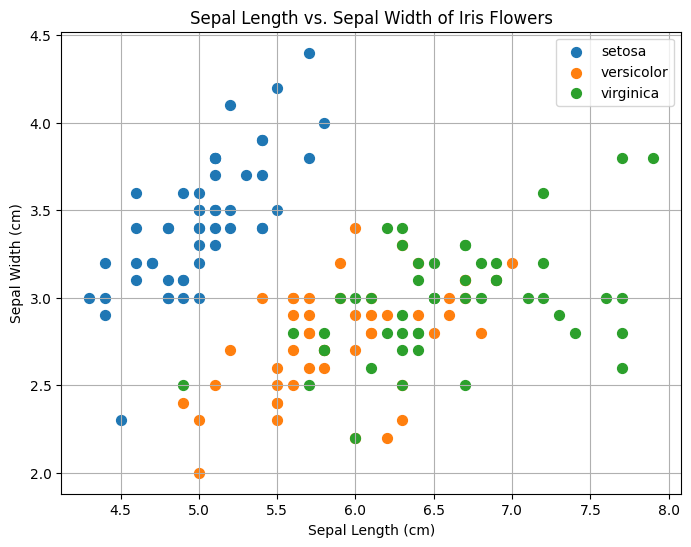

In [22]:
plt.figure(figsize=(8, 6))

for i, target_name in enumerate(iris.target_names):
    X_c = X[y == i]
    plt.scatter(X_c[:, 0], X_c[:, 1], s=50, label=target_name)

plt.title('Sepal Length vs. Sepal Width of Iris Flowers')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classes = np.unique(y_train)
n_features = X_train.shape[1]
n_samples_train = X_train.shape[0]

In [24]:
priors = {}
means = {}
shared_covariance = np.zeros((n_features, n_features))

for c in classes:
    X_c = X_train[y_train == c]
    priors[c] = len(X_c) / n_samples_train
    means[c] = np.mean(X_c, axis=0)

    shared_covariance += (len(X_c) - 1) * np.cov(X_c.T)

shared_covariance /= (n_samples_train - len(classes))

In [29]:
def multivariate_gaussian_log_pdf(x, mean, cov):
    n = len(x)

    cov_reg = cov + np.eye(n) * 1e-6

    sign, log_det = np.linalg.slogdet(cov_reg)
    inv_cov = np.linalg.inv(cov_reg)

    exponent = -0.5 * (x - mean).T @ inv_cov @ (x - mean)

    return -0.5 * n * np.log(2 * np.pi) - 0.5 * log_det + exponent

In [32]:
y_pred = []
for x_i in X_test:
    posteriors = {}
    for c in classes:
        log_likelihood = multivariate_gaussian_log_pdf(x_i, means[c], shared_covariance)
        log_prior = np.log(priors[c])

        posteriors[c] = log_prior + log_likelihood

    predicted_class = max(posteriors, key=posteriors.get)
    y_pred.append(predicted_class)

In [33]:
y_pred = np.array(y_pred)

print("Actual vs. Predicted Results:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {iris.target_names[actual]} | Predicted: {iris.target_names[predicted]}")

Actual vs. Predicted Results:
Actual: versicolor | Predicted: versicolor
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor
Actual: setosa | Predicted: setosa
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: setosa | Predicted: setosa
Actual: setosa | Predicted: setosa
Actual: setosa | Predicted: setosa
Actual: setosa | Predicted: setosa
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: versicolor | Predicted: versicolor
Actual: versicolor | Predicted: versicolor
Actual: virginica | Predicted: virginica
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: setosa | Predicted: setosa
Actual: virginica | Predicted: virginica
Actual: virginic

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


I do not like the 100%, but after much research, i can conclude that it can be attributed to the dataset